#  This notebook is for data exploration and reducing data where user has rated more than 50 product

#### Note
**This notebook has 3 main steps**

1. Exploration of original data : This step consists of various steps such as checking datatypes, describe statement, checking missing values, checking min and max value in rating column, factorplot and unique value of user and product Id of orignal data.

2. Reducing data : I have reduced data based on counts of user. Here i counted no of users who have rated 50 above ratings. Then I stored that in new variable so that original data doesn't change and at the end I saved that in new csv file so that I can use that new data in other notebook this saves lots of memory.

3. Exploration of reduced new data : This step consists of various steps such as checking datatypes, describe statement, checking missing values, checking min and max value in rating column, factorplot and unique value of user and product Id of new reduced data.


In [1]:
#importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load data with columns externally declared with obj 'col'
col=['userId','productId','Rating','Time_Stamp']
df1=pd.read_csv('ratings_Electronics.csv', header=None, names=col)

In [3]:
#To check if data is properly oaded
df1.head(10)

,userId,productId,Rating,Time_Stamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [4]:
#To check shape of data shape include no of rows and colum. No of row can also tell length of data
df1.shape

(7824482, 4)

In [5]:
#Drop time_stamp column
df1=df1.drop('Time_Stamp',axis=1)
df1.head(10)

,userId,productId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0
5,A1QGNMC6O1VW39,0511189877,5.0
6,A3J3BRHTDRFJ2G,0511189877,2.0
7,A2TY0BTJOTENPG,0511189877,5.0
8,A34ATBPOK6HCHY,0511189877,5.0
9,A89DO69P0XZ27,0511189877,5.0


In [6]:
# Check the number of rows and columns after droping Timestamp
rows, columns = df1.shape
print("No of rows: ", rows) 
print("No of columns: ", columns) 

No of rows:  7824482
No of columns:  3


## Explore data

In [7]:
#To see datatype of columns
df1.dtypes

#As I thought userId and productId is object and rating is float type

userId        object
productId     object
Rating       float64
dtype: object

In [8]:
# Check for missing values present

print('Number of missing values across columns-\n', df1.isnull().sum())

Number of missing values across columns-
 userId       0
productId    0
Rating       0
dtype: int64


In [9]:
# Summary statistics of 'rating' variable
df1.describe().T

#AS other columns i.e userId and productId are object they wont be shown in describe 
#Here data has left side skew with long tail in left side
#As this is recommendaton system his information is not that much of help

,count,mean,std,min,25%,50%,75%,max
Rating,7824482.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


In [10]:
# find minimum and maximum ratings
print('The minimum rating is: %d' %(df1['Rating'].min()))
print('The maximum rating is: %d' %(df1['Rating'].max()))

The minimum rating is: 1
The maximum rating is: 5


C:\Users\sarth\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


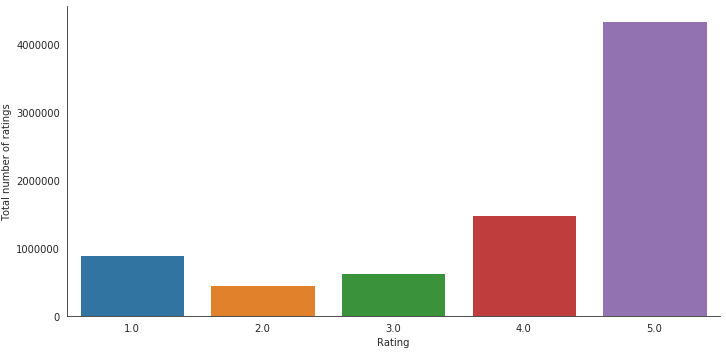

In [11]:
# Check the distribution of ratings columns 
with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=df1, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings") 

***Here when seeing plot I came to conclusion that most of users have rated 5 then users have rated 4 after that they have rated 1 and the least users have rated is 2***

In [12]:
# Number of unique user id and product id in the data
print('Number of unique USERS in Raw data = ', df1['userId'].nunique())
print('Number of unique ITEMS in Raw data = ', df1['productId'].nunique())

Number of unique USERS in Raw data =  4201696
Number of unique ITEMS in Raw data =  476002


## Reducing data 

As per the statement the data is being reduced in this steps. Users who hae rated more than 50 product have been selected in this  

In [13]:
#Data is reduced by user

#k=df1.groupby('productId')['Rating'].count()
#k=df1.groupby('productId').count()
k=df1.groupby('userId').count()

In [14]:
print(k)

                       productId  Rating
userId                                  
A00000262KYZUE4J55XGL          1       1
A000063614T1OE0BUSKUT          2       2
A00009182QVLSWIGHLS1B          1       1
A00009661LC9LQPGKJ24G          1       1
A00010809P09NUU6ZP6H           1       1
...                          ...     ...
AZZZOVIBXHGDR                  3       3
AZZZRS1YZ8HVP                  2       2
AZZZSIK7NFFVP                  1       1
AZZZWXXUPZ1F3                  1       1
AZZZY1W55XHZR                  1       1

[4201696 rows x 2 columns]


In [15]:
#Shape of count 
k.shape

(4201696, 2)

In [16]:
#Here I selected those who have rated 50 plus products
k=k[k['Rating']>50]
print(k)

                productId  Rating
userId                           
A100UD67AHFODS        116     116
A100WO06OQR8BQ        132     132
A105S56ODHGJEK         68      68
A105TOJ6LTVMBG         71      71
A10AFVU66A79Y1         65      65
...                   ...     ...
AZBXKUH4AIW3X          53      53
AZCE11PSTCH1L          60      60
AZMY6E8B52L2T         189     189
AZNUHQSHZHSUE          54      54
AZOK5STV85FBJ          54      54

[1466 rows x 2 columns]


print(len(k['userId'].unique())) #To see no of new users

In [17]:
k.head()

,productId,Rating
userId,,
A100UD67AHFODS,116,116
A100WO06OQR8BQ,132,132
A105S56ODHGJEK,68,68
A105TOJ6LTVMBG,71,71
A10AFVU66A79Y1,65,65


In [18]:
#storing index value to a new column 

#k['productId']=k.index
k['userId']=k.index

In [19]:
k.head()

,productId,Rating,userId
userId,,,
A100UD67AHFODS,116,116,A100UD67AHFODS
A100WO06OQR8BQ,132,132,A100WO06OQR8BQ
A105S56ODHGJEK,68,68,A105S56ODHGJEK
A105TOJ6LTVMBG,71,71,A105TOJ6LTVMBG
A10AFVU66A79Y1,65,65,A10AFVU66A79Y1


In [20]:
#Store all userId that have rated +50 product to a new variable in form of list so that it can be compared later on with original data

l=k['userId']
l=list(l)
print(l)

['A100UD67AHFODS', 'A100WO06OQR8BQ', 'A105S56ODHGJEK', 'A105TOJ6LTVMBG', 'A10AFVU66A79Y1', 'A10H24TDLK2VDP', 'A10NMELR4KX0J6', 'A10O7THJ2O20AG', 'A10PEXB6XAQ5XF', 'A10X9ME6R66JDX', 'A10Y058K7B96C6', 'A10ZBR6O8S8OCY', 'A10ZFE6YE0UHW8', 'A110PC8C5Y7MQD', 'A110VKXAVLAYKY', 'A111WCUF5KA2I6', 'A1143YEAZYMYHJ', 'A11D1KHM7DVOQK', 'A11ED8O95W2103', 'A11EXFO14WEJM1', 'A11EYMH9UV9XG7', 'A11FX8HL2ANK6T', 'A11I1I9QLMAM1A', 'A11IXJ8M1JO296', 'A11KZ906QD08C5', 'A11LNPG39A2ZV4', 'A11OTLEDSW8ZXD', 'A11P105WVK5240', 'A11T807LX2EF00', 'A11ULAZ4B5ZXC8', 'A11YIHB6IW352W', 'A11YOTONCPRQ9S', 'A124WZCUIH2T7W', 'A12ANFNOSMW5VD', 'A12DLJESJKM1OQ', 'A12DQZKRKTNF5E', 'A12EVK82QUTSA6', 'A12LH2100CKQO', 'A12O5SEIF162P8', 'A12R3YGEHW7D8G', 'A132ETQPMHQ585', 'A13BX9O5UDBILC', 'A13EQE9EY2ET93', 'A13QOK3SKIT9QL', 'A13WOT3RSXKRD5', 'A13WREJ05GMRA6', 'A141OPVE376YFI', 'A141R97FHSSUQ0', 'A1435P5AMCPB3X', 'A145B8OHVNNFAJ', 'A145LBW8ZHF0TW', 'A149RNR5RH19YY', 'A14I1F2H7NOYDC', 'A14JBDSWKPKTZA', 'A14MZJTZAQS6CV', 'A14NA0W8E

In [21]:
len(l) #It is same as pervious. This is just a cross check step

1466

In [22]:
df2=df1  #To store in new variable so that orignal Dats doesnot change

In [23]:

df2.head() #To check if data is loaded properly

,userId,productId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [24]:
#Compare list l with a copy of orignal data

#df2=df2[df2.productId.isin(l)]
#print(df2.head())

df2=df2[df2.userId.isin(l)]
print(df2.head())

             userId   productId  Rating
118   AT09WGFUM934H  0594481813     3.0
177  A32HSNCNPRUMTR  0970407998     1.0
178  A17HMM1M7T9PJ1  0970407998     4.0
492  A3CLWR1UUZT6TG  0972683275     5.0
631  A3TAS1AG6FMBQW  0972683275     5.0


In [25]:
#This is just a cross check step

#df2.groupby('productId').count().shape
df2.groupby('userId').count().shape

(1466, 2)

In [26]:
#As we have user id as index Thus changing index it to a number 
df2=df2.reset_index()

In [27]:
df2.head() #Cross check step

#here we need to drop index column

,index,userId,productId,Rating
0,118,AT09WGFUM934H,0594481813,3.0
1,177,A32HSNCNPRUMTR,0970407998,1.0
2,178,A17HMM1M7T9PJ1,0970407998,4.0
3,492,A3CLWR1UUZT6TG,0972683275,5.0
4,631,A3TAS1AG6FMBQW,0972683275,5.0


In [28]:
df2=df2.drop('index',axis=1)

In [29]:
df2.head()  #Cross check step

,userId,productId,Rating
0,AT09WGFUM934H,0594481813,3.0
1,A32HSNCNPRUMTR,0970407998,1.0
2,A17HMM1M7T9PJ1,0970407998,4.0
3,A3CLWR1UUZT6TG,0972683275,5.0
4,A3TAS1AG6FMBQW,0972683275,5.0


In [30]:
df2.shape

#This(shape) shows data has largely reduced

(122171, 3)

In [31]:
#SAVE THIS REDUCED DATA TO NEW CSV FILE SO THAT IT CAN BE USED IN RECOMMENDATION SYSTEM NOTEBOOK

df2.to_csv('short_data2.csv')

***After performing various steps the data has largely reduced.***

## Explore data on reduced data

This is done to see how much change has occured in new data. These are the same steps done above

In [32]:
#To see datatype of columns in new data
df2.dtypes


userId        object
productId     object
Rating       float64
dtype: object

In [33]:
# Summary statistics of 'rating' variable
df2.describe().T

#AS other columns i.e userId and productId are object they wont be shown in describe 
#Here data has left side skew with long tail in left side
#As this is recommendaton system his information is not that much of help

,count,mean,std,min,25%,50%,75%,max
Rating,122171.0,4.262616,1.058826,1.0,4.0,5.0,5.0,5.0


In [34]:
# find minimum and maximum ratings
print('The minimum rating is: %d' %(df2['Rating'].min()))
print('The maximum rating is: %d' %(df2['Rating'].max()))

The minimum rating is: 1
The maximum rating is: 5


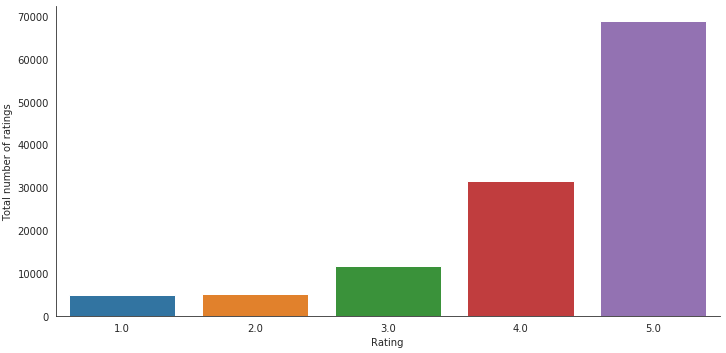

In [35]:
# Check the distribution of ratings columns in new data
with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=df2, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings") 
    
#As you can see the data is largely reduced people rating have changed people have rated 5 then 4 then 3 then 2 and 1
#Previously it was 5>4>1>3>2
#Also total number of ratings have largely reduced toofor each rating.

In [36]:
# Number of unique user id and product id in the new data
print('Number of unique USERS in Raw data = ', df2['userId'].nunique())
print('Number of unique ITEMS in Raw data = ', df2['productId'].nunique())

#Both decreased to a large extent

Number of unique USERS in Raw data =  1466
Number of unique ITEMS in Raw data =  47155
